# Slither Project

## Test environment 

In [2]:
import gym
import universe
import numpy as np
import tensorflow as tf

In [3]:
#export OPENAI_REMOTE_VERBOSE=0 ##put this in the terminal to remove verbose
env = gym.make('internet.SlitherIO-v0')

[2018-05-03 10:09:45,914] Making new env: internet.SlitherIO-v0


In [4]:
#actionlist = [action for action in env.action_space]
env.action_space.sample()

[KeyEvent<key=n (0x6e) direction=up>]

In [5]:
"""
There are 12 possible defined actions. The original number of actions are #pixels * 2, meaning we can
press any pixel on the screen to define directions and either press space at the same time or not. In order
to lower the number of allowed actions and still get a smooth direction control we decide to define 12 regions
in the border of the screen where we will press either the center of the region or a random pixel in that region
(depending on the strategy taken) so as to move in that direction.
"""
##y = 85-386, x = 18-522
topleft = (19,86)
bottomright = (522,386)
div_x = 5
div_y = 3
interx = int((bottomright[0]-topleft[0])/div_x)
intery = int((bottomright[1]-topleft[1])/div_y)
pointers = ([(topleft[0],topleft[1]+intery*i) for i in range(div_y-1,-1,-1)]+
           [(topleft[0]+interx*i,topleft[1]) for i in range(1,div_x-1)]+
           [(topleft[0]+interx*4,topleft[1]+intery*i) for i in range(div_y)]+
           [(topleft[0]+interx*i,topleft[1]+intery*2) for i in range(div_x-2,0,-1)])
nactions = 12


def idx2act(idx):
    p = [[('PointerEvent', x+int(interx/2), y+int(intery/2), 0)] for (x,y) in pointers]
    return p[idx]


p = idx2act(0)
#[i for i in range(3,-1,-1)]
p

[('PointerEvent', 69, 336, 0)]

In [6]:
env.configure(remotes=1)  # automatically creates a local docker container
observation_n = env.reset()
count = 0
#event = [('PointerEvent', 200,200, True)]
#event = [('PointerEvent', 504, 200, 0)]
#action_n = [event for ob in observation_n]  # your agent here
idx = -1
while True:
  idx+=1
  idx = idx%nactions
  action = idx2act(idx)
  action_n = [action for ob in observation_n]  # your agent here
  observation_n, reward_n, done_n, info = env.step(action_n)
  count += reward_n[0]
  print('action:',action,'\n observation:',observation_n,'\n reward:',reward_n,'\n done_n:',done_n,'\n info:',info,'\n count:',count)
  env.render()

[2018-05-03 10:09:47,869] Writing logs to file: /tmp/universe-21007.log
[2018-05-03 10:09:47,881] Ports used: dict_keys([5900, 15900, 15901, 5901])
[2018-05-03 10:09:47,882] [0] Creating container: image=quay.io/openai/universe.flashgames:0.20.28. Run the same thing by hand as: docker run -p 5902:5900 -p 15902:15900 --ipc host --privileged --cap-add SYS_ADMIN quay.io/openai/universe.flashgames:0.20.28
[2018-05-03 10:09:48,964] Remote closed: address=localhost:5902
[2018-05-03 10:09:48,966] At least one sockets was closed by the remote. Sleeping 1s...
[2018-05-03 10:09:49,968] Remote closed: address=localhost:15902
[2018-05-03 10:09:49,970] At least one sockets was closed by the remote. Sleeping 1s...
[2018-05-03 10:09:50,973] Using the golang VNC implementation
[2018-05-03 10:09:50,974] Using VNCSession arguments: {'subsample_level': 2, 'encoding': 'tight', 'fine_quality_level': 50, 'start_timeout': 7}. (Customize by running "env.configure(vnc_kwargs={...})"
[2018-05-03 10:09:50,987] [

action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014901876449584961, 'n': [{'stats.vnc.updates.bytes': 207, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 13, 'stats.vnc.updates.pixels': 786592, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334991.0070913, 'throttle.action.available_at': 1525334990.9914212} 
 count: 0.0
action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0, 'n': [{'stats.vnc.updates.bytes': 12968, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 13, 'stats.vnc.updates.pixels': 751152, 'mask.masked.action': Tr

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01337575912475586, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334991.622718, 'throttle.action.available_at': 1525334991.6088722} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01310586929321289, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01535487174987793, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334992.0466425, 'throttle.action.available_at': 1525334992.0309951} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015152931213378906, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stat

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015046834945678711, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334992.467418, 'throttle.action.available_at': 1525334992.4520388} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014956474304199219, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stat

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01357126235961914, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334992.891363, 'throttle.action.available_at': 1525334992.8774087} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01470327377319336, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014518260955810547, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334993.3139544, 'throttle.action.available_at': 1525334993.2989733} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014384031295776367, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014722347259521484, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334993.7385314, 'throttle.action.available_at': 1525334993.7233925} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014612436294555664, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014652013778686523, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334994.1620884, 'throttle.action.available_at': 1525334994.147032} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014673233032226562, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stat

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014937162399291992, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334994.5838716, 'throttle.action.available_at': 1525334994.5686324} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015169382095336914, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013952970504760742, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334995.0063317, 'throttle.action.available_at': 1525334994.9919767} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014469623565673828, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.011203289031982422, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334995.4288344, 'throttle.action.available_at': 1525334995.4170442} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012665510177612305, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013428688049316406, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334995.853402, 'throttle.action.available_at': 1525334995.8394732} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013973236083984375, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stat

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014043092727661133, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334996.2776222, 'throttle.action.available_at': 1525334996.2630224} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013771772384643555, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015032052993774414, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334996.6994348, 'throttle.action.available_at': 1525334996.6839554} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0, 'n': [{'stats.vnc.updates.bytes': 0, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012499809265136719, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334997.1292748, 'throttle.action.available_at': 1525334997.1163154} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013557672500610352, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013354778289794922, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334997.553341, 'throttle.action.available_at': 1525334997.5396206} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014850854873657227, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stat

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014733314514160156, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334997.9753072, 'throttle.action.available_at': 1525334997.9602146} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014562606811523438, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013532638549804688, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334998.395241, 'throttle.action.available_at': 1525334998.3809822} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01323556900024414, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013244867324829102, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334998.8159797, 'throttle.action.available_at': 1525334998.8023176} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014784574508666992, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013595104217529297, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334999.237979, 'throttle.action.available_at': 1525334999.2238} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012889385223388672, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.v

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015058517456054688, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525334999.6601439, 'throttle.action.available_at': 1525334999.6447325} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015230655670166016, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.010042428970336914, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335000.0837977, 'throttle.action.available_at': 1525335000.0730002} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012012481689453125, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01459813117980957, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335000.50759, 'throttle.action.available_at': 1525335000.49264} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014954090118408203, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vn

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015213251113891602, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335000.9249876, 'throttle.action.available_at': 1525335000.9094296} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015359163284301758, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014379262924194336, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335001.3433144, 'throttle.action.available_at': 1525335001.3286066} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014617204666137695, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01301717758178711, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335001.7660518, 'throttle.action.available_at': 1525335001.7525687} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013775825500488281, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stat

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013704299926757812, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335002.1887248, 'throttle.action.available_at': 1525335002.1745548} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014945507049560547, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012793540954589844, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335002.6110606, 'throttle.action.available_at': 1525335002.5975933} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013362407684326172, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015207052230834961, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335003.0338693, 'throttle.action.available_at': 1525335003.0183308} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015157222747802734, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015178203582763672, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335003.4534438, 'throttle.action.available_at': 1525335003.4379175} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015218973159790039, 'n': [{'stats.vnc.updates.bytes': 283, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 's

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015140295028686523, 'n': [{'stats.vnc.updates.bytes': 4158, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 2, 'stats.vnc.updates.pixels': 41472, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335003.8749542, 'throttle.action.available_at': 1525335003.859201} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015372276306152344, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012189149856567383, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335004.2971938, 'throttle.action.available_at': 1525335004.2846067} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014761924743652344, 'n': [{'stats.vnc.updates.bytes': 113, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 's

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.011993885040283203, 'n': [{'stats.vnc.updates.bytes': 158, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 256, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335004.7205405, 'throttle.action.available_at': 1525335004.70773} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012870073318481445, 'n': [{'stats.vnc.updates.bytes': 166, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015226125717163086, 'n': [{'stats.vnc.updates.bytes': 1476, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 7659, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335005.1401694, 'throttle.action.available_at': 1525335005.124582} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015119791030883789, 'n': [{'stats.vnc.updates.bytes': 114, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015255451202392578, 'n': [{'stats.vnc.updates.bytes': 54, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 256, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335005.555105, 'throttle.action.available_at': 1525335005.539559} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014245271682739258, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'st

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015081167221069336, 'n': [{'stats.vnc.updates.bytes': 149, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 256, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335005.9705718, 'throttle.action.available_at': 1525335005.955164} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015371561050415039, 'n': [{'stats.vnc.updates.bytes': 160, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1,

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015242815017700195, 'n': [{'stats.vnc.updates.bytes': 135, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 256, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335006.3855233, 'throttle.action.available_at': 1525335006.3699317} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014908790588378906, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015223979949951172, 'n': [{'stats.vnc.updates.bytes': 50, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 256, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335006.8008862, 'throttle.action.available_at': 1525335006.7853377} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014924764633178711, 'n': [{'stats.vnc.updates.bytes': 49, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015297889709472656, 'n': [{'stats.vnc.updates.bytes': 147, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 256, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335007.2163913, 'throttle.action.available_at': 1525335007.2007196} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015182256698608398, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015015125274658203, 'n': [{'stats.vnc.updates.bytes': 178, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 256, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335007.6325557, 'throttle.action.available_at': 1525335007.6171489} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015022993087768555, 'n': [{'stats.vnc.updates.bytes': 159, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1

action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015250205993652344, 'n': [{'stats.vnc.updates.bytes': 238, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 11448, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335008.0474668, 'throttle.action.available_at': 1525335008.0318725} 
 count: 0.0
action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015036344528198242, 'n': [{'stats.vnc.updates.bytes': 1406, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles'

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.00910329818725586, 'n': [{'stats.vnc.updates.bytes': 9751, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 7, 'stats.vnc.updates.pixels': 110240, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335008.465041, 'throttle.action.available_at': 1525335008.4549515} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.008578777313232422, 'n': [{'stats.vnc.updates.bytes': 984, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014779329299926758, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335008.8968403, 'throttle.action.available_at': 1525335008.8817165} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014023065567016602, 'n': [{'stats.vnc.updates.bytes': 179, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'st

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015165567398071289, 'n': [{'stats.vnc.updates.bytes': 6132, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 4, 'stats.vnc.updates.pixels': 45056, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335009.3248343, 'throttle.action.available_at': 1525335009.3090973} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015317201614379883, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015339851379394531, 'n': [{'stats.vnc.updates.bytes': 5747, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 40960, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335009.7430618, 'throttle.action.available_at': 1525335009.7271757} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015383720397949219, 'n': [{'stats.vnc.updates.bytes': 4113, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles'

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015030622482299805, 'n': [{'stats.vnc.updates.bytes': 3260, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 2, 'stats.vnc.updates.pixels': 16384, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335010.163242, 'throttle.action.available_at': 1525335010.1478128} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015377283096313477, 'n': [{'stats.vnc.updates.bytes': 7584, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles':

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013126850128173828, 'n': [{'stats.vnc.updates.bytes': 6013, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 45056, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335010.5871148, 'throttle.action.available_at': 1525335010.5726984} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01336050033569336, 'n': [{'stats.vnc.updates.bytes': 131, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015386343002319336, 'n': [{'stats.vnc.updates.bytes': 1956, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 2, 'stats.vnc.updates.pixels': 16384, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335011.008895, 'throttle.action.available_at': 1525335010.9930758} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015148162841796875, 'n': [{'stats.vnc.updates.bytes': 5249, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles':

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015099763870239258, 'n': [{'stats.vnc.updates.bytes': 5224, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 2, 'stats.vnc.updates.pixels': 40960, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335011.4308364, 'throttle.action.available_at': 1525335011.4150963} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013448476791381836, 'n': [{'stats.vnc.updates.bytes': 6593, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles'

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014937400817871094, 'n': [{'stats.vnc.updates.bytes': 7928, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 65536, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335011.854935, 'throttle.action.available_at': 1525335011.839473} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01512598991394043, 'n': [{'stats.vnc.updates.bytes': 6724, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 2

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015169143676757812, 'n': [{'stats.vnc.updates.bytes': 7929, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 65536, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335012.2767742, 'throttle.action.available_at': 1525335012.2608633} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015341520309448242, 'n': [{'stats.vnc.updates.bytes': 16541, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015255928039550781, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335012.6981127, 'throttle.action.available_at': 1525335012.6825535} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015102863311767578, 'n': [{'stats.vnc.updates.bytes': 6856, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 3, 's

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014919042587280273, 'n': [{'stats.vnc.updates.bytes': 1220, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 8192, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335013.1196156, 'throttle.action.available_at': 1525335013.1042411} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014456987380981445, 'n': [{'stats.vnc.updates.bytes': 5096, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles':

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014952421188354492, 'n': [{'stats.vnc.updates.bytes': 5168, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 2, 'stats.vnc.updates.pixels': 40960, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335013.540708, 'throttle.action.available_at': 1525335013.5249772} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015295743942260742, 'n': [{'stats.vnc.updates.bytes': 1260, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles':

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015265226364135742, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335013.961163, 'throttle.action.available_at': 1525335013.9455953} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014968156814575195, 'n': [{'stats.vnc.updates.bytes': 5158, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 2, 'st

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014939308166503906, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335014.3828728, 'throttle.action.available_at': 1525335014.3676825} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014998197555541992, 'n': [{'stats.vnc.updates.bytes': 5131, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 2, 's

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01400136947631836, 'n': [{'stats.vnc.updates.bytes': 4680, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 4, 'stats.vnc.updates.pixels': 40120, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335014.802457, 'throttle.action.available_at': 1525335014.7880821} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.0149078369140625, 'n': [{'stats.vnc.updates.bytes': 4972, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 3,

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015394926071166992, 'n': [{'stats.vnc.updates.bytes': 3628, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 44216, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335015.222731, 'throttle.action.available_at': 1525335015.2067432} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014658927917480469, 'n': [{'stats.vnc.updates.bytes': 2703, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles':

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.011108636856079102, 'n': [{'stats.vnc.updates.bytes': 88, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 4, 'stats.vnc.updates.pixels': 511, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335015.643746, 'throttle.action.available_at': 1525335015.6322424} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014640092849731445, 'n': [{'stats.vnc.updates.bytes': 3251, 'peek': True, 'stats.vnc.updates.n': 4, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 7, 

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014737844467163086, 'n': [{'stats.vnc.updates.bytes': 1559, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 16384, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335016.063674, 'throttle.action.available_at': 1525335016.0484824} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014827251434326172, 'n': [{'stats.vnc.updates.bytes': 1695, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles':

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01412510871887207, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335016.486478, 'throttle.action.available_at': 1525335016.4718568} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014450311660766602, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013901710510253906, 'n': [{'stats.vnc.updates.bytes': 3123, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 2, 'stats.vnc.updates.pixels': 32768, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335016.9080868, 'throttle.action.available_at': 1525335016.8936644} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014984846115112305, 'n': [{'stats.vnc.updates.bytes': 1557, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles'

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014603376388549805, 'n': [{'stats.vnc.updates.bytes': 1509, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 16384, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335017.3319652, 'throttle.action.available_at': 1525335017.3163347} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012495040893554688, 'n': [{'stats.vnc.updates.bytes': 1488, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles'

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012496471405029297, 'n': [{'stats.vnc.updates.bytes': 1371, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 16384, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335017.7559817, 'throttle.action.available_at': 1525335017.742706} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013422012329101562, 'n': [{'stats.vnc.updates.bytes': 2750, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles':

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015398979187011719, 'n': [{'stats.vnc.updates.bytes': 1104, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 8192, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335018.178709, 'throttle.action.available_at': 1525335018.162813} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013421058654785156, 'n': [{'stats.vnc.updates.bytes': 1105, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01290750503540039, 'n': [{'stats.vnc.updates.bytes': 1180, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 8192, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335018.6009526, 'throttle.action.available_at': 1525335018.587251} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012940406799316406, 'n': [{'stats.vnc.updates.bytes': 1184, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012707948684692383, 'n': [{'stats.vnc.updates.bytes': 1202, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 8192, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335019.0290349, 'throttle.action.available_at': 1525335019.015561} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.00942683219909668, 'n': [{'stats.vnc.updates.bytes': 1205, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012919187545776367, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335019.459781, 'throttle.action.available_at': 1525335019.4462945} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013290643692016602, 'n': [{'stats.vnc.updates.bytes': 1228, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'st

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01211690902709961, 'n': [{'stats.vnc.updates.bytes': 2420, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 2, 'stats.vnc.updates.pixels': 16384, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335019.8927019, 'throttle.action.available_at': 1525335019.879815} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012961149215698242, 'n': [{'stats.vnc.updates.bytes': 1205, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014475584030151367, 'n': [{'stats.vnc.updates.bytes': 1185, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 8192, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335020.3101814, 'throttle.action.available_at': 1525335020.2953577} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015289783477783203, 'n': [{'stats.vnc.updates.bytes': 1191, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles':

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015067338943481445, 'n': [{'stats.vnc.updates.bytes': 1200, 'peek': True, 'stats.vnc.updates.n': 3, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 5, 'stats.vnc.updates.pixels': 8703, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335020.7266257, 'throttle.action.available_at': 1525335020.7111695} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01536417007446289, 'n': [{'stats.vnc.updates.bytes': 1106, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015323400497436523, 'n': [{'stats.vnc.updates.bytes': 1116, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 8192, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335021.1428206, 'throttle.action.available_at': 1525335021.1271002} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015130996704101562, 'n': [{'stats.vnc.updates.bytes': 1130, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles':

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015074014663696289, 'n': [{'stats.vnc.updates.bytes': 1208, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 8192, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335021.5597532, 'throttle.action.available_at': 1525335021.5442479} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014801025390625, 'n': [{'stats.vnc.updates.bytes': 1212, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1,

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015295267105102539, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335021.9757218, 'throttle.action.available_at': 1525335021.9600968} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014912128448486328, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stat

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014861583709716797, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335022.393516, 'throttle.action.available_at': 1525335022.378301} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014594554901123047, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01529693603515625, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335022.8081665, 'throttle.action.available_at': 1525335022.7925587} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015340566635131836, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015413045883178711, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335023.2225118, 'throttle.action.available_at': 1525335023.2067401} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012845039367675781, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stat

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014533042907714844, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335023.6433313, 'throttle.action.available_at': 1525335023.6284425} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014960527420043945, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015301227569580078, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335024.0580473, 'throttle.action.available_at': 1525335024.0424793} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014813899993896484, 'n': [{'stats.vnc.updates.bytes': 673, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 's

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014941930770874023, 'n': [{'stats.vnc.updates.bytes': 101, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 256, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335024.4774249, 'throttle.action.available_at': 1525335024.4621964} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014934301376342773, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015358686447143555, 'n': [{'stats.vnc.updates.bytes': 132, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 256, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335024.8921263, 'throttle.action.available_at': 1525335024.876466} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015360355377197266, 'n': [{'stats.vnc.updates.bytes': 133, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1,

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015138864517211914, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335025.306263, 'throttle.action.available_at': 1525335025.290793} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014744758605957031, 'n': [{'stats.vnc.updates.bytes': 137, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'sta

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015363693237304688, 'n': [{'stats.vnc.updates.bytes': 127, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 256, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335025.721072, 'throttle.action.available_at': 1525335025.7053392} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014963865280151367, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, '

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015346765518188477, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335026.1361706, 'throttle.action.available_at': 1525335026.1204157} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015209674835205078, 'n': [{'stats.vnc.updates.bytes': 66, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'st

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015209197998046875, 'n': [{'stats.vnc.updates.bytes': 131, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 256, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335026.5519192, 'throttle.action.available_at': 1525335026.5363424} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014952659606933594, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015146732330322266, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335026.9673216, 'throttle.action.available_at': 1525335026.9518774} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014751195907592773, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014879226684570312, 'n': [{'stats.vnc.updates.bytes': 138, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 256, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335027.382719, 'throttle.action.available_at': 1525335027.3675056} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013871192932128906, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, '

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014954090118408203, 'n': [{'stats.vnc.updates.bytes': 38, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 2, 'stats.vnc.updates.pixels': 171, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335027.8033476, 'throttle.action.available_at': 1525335027.7879984} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015224456787109375, 'n': [{'stats.vnc.updates.bytes': 9929, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 6

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014492988586425781, 'n': [{'stats.vnc.updates.bytes': 13924, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 8, 'stats.vnc.updates.pixels': 105984, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335028.2292023, 'throttle.action.available_at': 1525335028.2144115} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014904975891113281, 'n': [{'stats.vnc.updates.bytes': 13944, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectang

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014863252639770508, 'n': [{'stats.vnc.updates.bytes': 4196, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 2, 'stats.vnc.updates.pixels': 36864, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335028.6518197, 'throttle.action.available_at': 1525335028.636241} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015065670013427734, 'n': [{'stats.vnc.updates.bytes': 4270, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles'

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014753103256225586, 'n': [{'stats.vnc.updates.bytes': 4662, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 2, 'stats.vnc.updates.pixels': 36864, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335029.0707433, 'throttle.action.available_at': 1525335029.0556297} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015044450759887695, 'n': [{'stats.vnc.updates.bytes': 4603, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014340877532958984, 'n': [{'stats.vnc.updates.bytes': 1558, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 7659, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335029.4910092, 'throttle.action.available_at': 1525335029.476145} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.015158891677856445, 'n': [{'stats.vnc.updates.bytes': 5266, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles':

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014950275421142578, 'n': [{'stats.vnc.updates.bytes': 6941, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 65696, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335029.9128659, 'throttle.action.available_at': 1525335029.8971398} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014390945434570312, 'n': [{'stats.vnc.updates.bytes': 7933, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01486825942993164, 'n': [{'stats.vnc.updates.bytes': 4008, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 24736, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335030.3343794, 'throttle.action.available_at': 1525335030.318927} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01500558853149414, 'n': [{'stats.vnc.updates.bytes': 5683, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014533519744873047, 'n': [{'stats.vnc.updates.bytes': 15923, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 4, 'stats.vnc.updates.pixels': 164000, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335030.7609754, 'throttle.action.available_at': 1525335030.7451198} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014826774597167969, 'n': [{'stats.vnc.updates.bytes': 16670, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectang

action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013068675994873047, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335031.1970618, 'throttle.action.available_at': 1525335031.1835835} 
 count: 0.0
action: [('PointerEvent', 69, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012915372848510742, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 0, 'sta

action: [('PointerEvent', 269, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014510154724121094, 'n': [{'stats.vnc.updates.bytes': 13506, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 150600, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335031.6208432, 'throttle.action.available_at': 1525335031.6047761} 
 count: 0.0
action: [('PointerEvent', 169, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013617992401123047, 'n': [{'stats.vnc.updates.bytes': 13497, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectan

action: [('PointerEvent', 369, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013870000839233398, 'n': [{'stats.vnc.updates.bytes': 13801, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 150600, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335032.047436, 'throttle.action.available_at': 1525335032.0320377} 
 count: 0.0
action: [('PointerEvent', 269, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014468193054199219, 'n': [{'stats.vnc.updates.bytes': 13824, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectang

action: [('PointerEvent', 469, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014559745788574219, 'n': [{'stats.vnc.updates.bytes': 15401, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 6, 'stats.vnc.updates.pixels': 183616, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335032.4699872, 'throttle.action.available_at': 1525335032.4539945} 
 count: 0.0
action: [('PointerEvent', 369, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014141559600830078, 'n': [{'stats.vnc.updates.bytes': 13890, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectan

action: [('PointerEvent', 469, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012134552001953125, 'n': [{'stats.vnc.updates.bytes': 15264, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 4, 'stats.vnc.updates.pixels': 173440, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335032.8967824, 'throttle.action.available_at': 1525335032.8832338} 
 count: 0.0
action: [('PointerEvent', 469, 336, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013774633407592773, 'n': [{'stats.vnc.updates.bytes': 13824, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectan

action: [('PointerEvent', 469, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012723207473754883, 'n': [{'stats.vnc.updates.bytes': 14927, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 160640, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335033.3221536, 'throttle.action.available_at': 1525335033.3070347} 
 count: 0.0
action: [('PointerEvent', 469, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.010651826858520508, 'n': [{'stats.vnc.updates.bytes': 15842, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectan

action: [('PointerEvent', 469, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013738632202148438, 'n': [{'stats.vnc.updates.bytes': 34231, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 8, 'stats.vnc.updates.pixels': 332800, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335033.757931, 'throttle.action.available_at': 1525335033.742939} 
 count: 0.0
action: [('PointerEvent', 469, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013750314712524414, 'n': [{'stats.vnc.updates.bytes': 16882, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangl

[2018-05-03 10:10:34,090] [0:localhost:5902] Initial reset complete: episode_id=2


action: [('PointerEvent', 469, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013169050216674805, 'n': [{'stats.vnc.updates.bytes': 36115, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles': 7, 'stats.vnc.updates.pixels': 338048, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': None, 'env_status.peek.episode_id': None}], 'throttle.observation.available_at': 1525335033.978199, 'throttle.action.available_at': 1525335033.9630508} 
 count: 0.0
action: [('PointerEvent', 469, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.011982440948486328, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': None, 'env_status.env_state': None, 'stats.vnc.updates.rectangles'

action: [('PointerEvent', 469, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012267827987670898, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 369, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012360572814941406, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 369, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01361083984375, 'n': [{'stats.vnc.updates.bytes': 

action: [('PointerEvent', 269, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.011426210403442383, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 169, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01244044303894043, 'n': [{'stats.vnc.updates.bytes

action: [('PointerEvent', 69, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.00012421607971191406, 'n': [{'stats.vnc.updates.byt

action: [('PointerEvent', 69, 236, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012671232223510742, 'n': [{'stats.vnc.updates.bytes

action: [('PointerEvent', 69, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01273345947265625, 'n': [{'stats.vnc.updates.bytes'

 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012060165405273438, 'n': [{'stats.vnc.updates.bytes': 18210, 'peek': True, 'stats.vnc.updat

action: [('PointerEvent', 69, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01099538803100586, 'n': [{'stats.vnc.updates.bytes'

action: [('PointerEvent', 69, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.00793313980102539, 'n': [{'stats.vnc.updates.bytes'

action: [('PointerEvent', 69, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.009085416793823242, 'n': [{'stats.vnc.updates.bytes

action: [('PointerEvent', 169, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01290750503540039, 'n': [{'stats.vnc.updates.bytes

action: [('PointerEvent', 169, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01337122917175293, 'n': [{'stats.vnc.updates.bytes

action: [('PointerEvent', 269, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012633085250854492, 'n': [{'stats.vnc.updates.byte

 info: {'stats.throttle.sleep': 0.010829448699951172, 'n': [{'stats.vnc.updates.bytes': 36617, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'stats.gauges.diagnostics.clock_skew': array([-0.00063381,  0.00299115]), 'env_status.peek.env_state': 'running', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 6, 'stats.vnc.updates.pixels': 327680, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '2', 'env_status.peek.episode_id': '3'}], 'throttle.observation.available_at': 1525335037.3779893, 'throttle.action.available_at': 1525335037.365506} 
 count: 0.0
action: [('PointerEvent', 269, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0

action: [('PointerEvent', 369, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013322114944458008, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01333475112915039, 'n': [{'stats.vnc.updates.bytes

action: [('PointerEvent', 469, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013076305389404297, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012766599655151367, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012957096099853516, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013079166412353516, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.011455774307250977, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 236, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012961387634277344, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 236, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012686729431152344, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 236, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01269078254699707, 'n': [{'stats.vnc.updates.bytes

action: [('PointerEvent', 469, 236, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012559175491333008, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012787818908691406, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01265716552734375, 'n': [{'stats.vnc.updates.bytes

action: [('PointerEvent', 469, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013274908065795898, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012366056442260742, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012668132781982422, 'n': [{'stats.vnc.updates.byte

 info: {'stats.throttle.sleep': 0.012743473052978516, 'n': [{'stats.vnc.updates.bytes': 18693, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'stats.gauges.diagnostics.clock_skew': array([-0.00063381,  0.00299115]), 'env_status.peek.env_state': 'running', 'stats.gauges.diagnostics.lag.action': None, 'env_status.env_state': 'resetting', 'stats.gauges.diagnostics.lag.observation': array([0.05707436, 0.06069932]), 'stats.vnc.updates.rectangles': 9, 'stats.vnc.updates.pixels': 126976, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '2', 'env_status.peek.episode_id': '3'}], 'throttle.observation.available_at': 1525335041.0421746, 'throttle.action.available_at': 1525335041.0282063} 
 count: 0.0
action: [('PointerEvent', 469, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],


 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012970685958862305, 'n': [{'stats.vnc.updates.bytes': 18153, 'peek': True, 'stats.vnc.updat

action: [('PointerEvent', 369, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012970924377441406, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 269, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01270604133605957, 'n': [{'stats.vnc.updates.bytes

action: [('PointerEvent', 269, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012643098831176758, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013747453689575195, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335042.1119606, 'throttle.action.available_at': 1525335042.0978866} 
 count: 0.0
action: [('PointerEvent', 369, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012612581253051758, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.u

action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01423788070678711, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335042.5269186, 'throttle.action.available_at': 1525335042.512425} 
 count: 0.0
action: [('PointerEvent', 369, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014573097229003906, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.upd

action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013987541198730469, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335042.9440014, 'throttle.action.available_at': 1525335042.9296906} 
 count: 0.0
action: [('PointerEvent', 369, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013969659805297852, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.u

action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01429891586303711, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335043.359953, 'throttle.action.available_at': 1525335043.3453183} 
 count: 0.0
action: [('PointerEvent', 369, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014173269271850586, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.upd

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014292001724243164, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335043.7848473, 'throttle.action.available_at': 1525335043.7702515} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01379537582397461, 'n': [{'stats.vnc.updates.bytes': 107, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01379704475402832, 'n': [{'stats.vnc.updates.bytes': 147, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 256, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335044.2003763, 'throttle.action.available_at': 1525335044.186227} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01425480842590332, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014291048049926758, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335044.615272, 'throttle.action.available_at': 1525335044.6006162} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013704776763916016, 'n': [{'stats.vnc.updates.bytes': 140, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014361858367919922, 'n': [{'stats.vnc.updates.bytes': 130, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 256, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335045.030587, 'throttle.action.available_at': 1525335045.0157626} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013421058654785156, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vn

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014343738555908203, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335045.4459915, 'throttle.action.available_at': 1525335045.431323} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014163732528686523, 'n': [{'stats.vnc.updates.bytes': 132, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014266729354858398, 'n': [{'stats.vnc.updates.bytes': 120, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 256, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335045.8609812, 'throttle.action.available_at': 1525335045.8463638} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014297723770141602, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.v

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014547586441040039, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335046.2761157, 'throttle.action.available_at': 1525335046.2612529} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014487266540527344, 'n': [{'stats.vnc.updates.bytes': 67, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013847112655639648, 'n': [{'stats.vnc.updates.bytes': 135, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 256, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335046.691355, 'throttle.action.available_at': 1525335046.677167} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01369333267211914, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014295339584350586, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335047.106481, 'throttle.action.available_at': 1525335047.091893} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014402627944946289, 'n': [{'stats.vnc.updates.bytes': 7307, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013326883316040039, 'n': [{'stats.vnc.updates.bytes': 11191, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 6, 'stats.vnc.updates.pixels': 110080, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335047.5313604, 'throttle.action.available_at': 1525335047.5176165} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.010746002197265625, 'n': [{'stats.vnc.updates.bytes': 13010, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting',

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014130353927612305, 'n': [{'stats.vnc.updates.bytes': 570, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 4096, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335047.9545727, 'throttle.action.available_at': 1525335047.9399996} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012714385986328125, 'n': [{'stats.vnc.updates.bytes': 17579, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'st

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014391422271728516, 'n': [{'stats.vnc.updates.bytes': 4135, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 2, 'stats.vnc.updates.pixels': 33024, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335048.3737648, 'throttle.action.available_at': 1525335048.3590245} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01444697380065918, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01417994499206543, 'n': [{'stats.vnc.updates.bytes': 4147, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 1, 'stats.vnc.updates.pixels': 32768, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335048.7917242, 'throttle.action.available_at': 1525335048.7768333} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013368606567382812, 'n': [{'stats.vnc.updates.bytes': 139, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'sta

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014288663864135742, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335049.210566, 'throttle.action.available_at': 1525335049.1958303} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014143228530883789, 'n': [{'stats.vnc.updates.bytes': 5340, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012830972671508789, 'n': [{'stats.vnc.updates.bytes': 5235, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 2, 'stats.vnc.updates.pixels': 40960, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335049.6309845, 'throttle.action.available_at': 1525335049.6173854} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01371002197265625, 'n': [{'stats.vnc.updates.bytes': 1186, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'st

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012788057327270508, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335050.0511625, 'throttle.action.available_at': 1525335050.0380447} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013400793075561523, 'n': [{'stats.vnc.updates.bytes': 5217, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vn

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014422416687011719, 'n': [{'stats.vnc.updates.bytes': 7147, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 49152, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335050.4723496, 'throttle.action.available_at': 1525335050.4573529} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014507532119750977, 'n': [{'stats.vnc.updates.bytes': 3884, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 's

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012121438980102539, 'n': [{'stats.vnc.updates.bytes': 5096, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 28672, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335050.8945274, 'throttle.action.available_at': 1525335050.8808389} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013898134231567383, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stat

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013860464096069336, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335051.3242068, 'throttle.action.available_at': 1525335051.3100505} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014091730117797852, 'n': [{'stats.vnc.updates.bytes': 16256, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.v

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013135433197021484, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335051.7573009, 'throttle.action.available_at': 1525335051.7438862} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012107610702514648, 'n': [{'stats.vnc.updates.bytes': 29264, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.v

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012845993041992188, 'n': [{'stats.vnc.updates.bytes': 15471, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 6, 'stats.vnc.updates.pixels': 177504, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335052.1888478, 'throttle.action.available_at': 1525335052.1756575} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01387476921081543, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'sta

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013895034790039062, 'n': [{'stats.vnc.updates.bytes': 13882, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 150600, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335052.6219845, 'throttle.action.available_at': 1525335052.6066296} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.011527061462402344, 'n': [{'stats.vnc.updates.bytes': 15242, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting',

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012831926345825195, 'n': [{'stats.vnc.updates.bytes': 14014, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 150600, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335053.0553122, 'throttle.action.available_at': 1525335053.0421777} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012285470962524414, 'n': [{'stats.vnc.updates.bytes': 29294, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting',

action: [('PointerEvent', 169, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01338958740234375, 'n': [{'stats.vnc.updates.bytes': 15424, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 5, 'stats.vnc.updates.pixels': 177344, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335053.492619, 'throttle.action.available_at': 1525335053.4777534} 
 count: 0.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.011448383331298828, 'n': [{'stats.vnc.updates.bytes': 14050, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', '

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01331949234008789, 'n': [{'stats.vnc.updates.bytes': 13848, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 150600, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335053.9016488, 'throttle.action.available_at': 1525335053.8860435} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.010654926300048828, 'n': [{'stats.vnc.updates.bytes': 13923, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 's

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013466835021972656, 'n': [{'stats.vnc.updates.bytes': 14907, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 163840, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335054.339366, 'throttle.action.available_at': 1525335054.3242} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012000322341918945, 'n': [{'stats.vnc.updates.bytes': 28688, 'peek': True, 'stats.vnc.updates.n': 2, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stat

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01254725456237793, 'n': [{'stats.vnc.updates.bytes': 13802, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 3, 'stats.vnc.updates.pixels': 150600, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335054.77272, 'throttle.action.available_at': 1525335054.7583117} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013623237609863281, 'n': [{'stats.vnc.updates.bytes': 13857, 'peek': True, 'stats.vnc.updates.n': 1, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'sta

action: [('PointerEvent', 69, 236, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013411521911621094, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.updates.rectangles': 0, 'stats.vnc.updates.pixels': 0, 'mask.masked.action': True, 'stats.reward.count': 0, 'env_status.episode_id': '4', 'env_status.peek.episode_id': '4'}], 'throttle.observation.available_at': 1525335055.2070055, 'throttle.action.available_at': 1525335055.1932104} 
 count: 0.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [None] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012801885604858398, 'n': [{'stats.vnc.updates.bytes': 0, 'peek': True, 'stats.vnc.updates.n': 0, 'mask.masked.observation': True, 'env_status.peek.env_state': 'resetting', 'env_status.env_state': 'resetting', 'stats.vnc.upd

action: [('PointerEvent', 69, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.008663177490234375, 'n': [{'stats.vnc.updates.bytes

action: [('PointerEvent', 69, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012941598892211914, 'n': [{'stats.vnc.updates.bytes

action: [('PointerEvent', 169, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.011191129684448242, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 169, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.010585308074951172, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 169, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.011183500289916992, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 269, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.00785064697265625, 'n': [{'stats.vnc.updates.bytes

action: [('PointerEvent', 369, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.010665178298950195, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 369, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.011665105819702148, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 369, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.009870529174804688, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 369, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01146841049194336, 'n': [{'stats.vnc.updates.bytes

 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.011478662490844727, 'n': [{'stats.vnc.updates.bytes': 18505, 'peek': True, 'stats.vnc.updat

action: [('PointerEvent', 369, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01008915901184082, 'n': [{'stats.vnc.updates.bytes

action: [('PointerEvent', 369, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.009203910827636719, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 369, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.008404970169067383, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.009458780288696289, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.011577844619750977, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012355804443359375, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 236, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012266874313354492, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 236, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.009549856185913086, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 236, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.007971763610839844, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 236, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.010358810424804688, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 236, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.006742715835571289, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 469, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0, 'n': [{'stats.vnc.updates.bytes': 20523, 'stats.v

action: [('PointerEvent', 369, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013097763061523438, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 369, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01268625259399414, 'n': [{'stats.vnc.updates.bytes

action: [('PointerEvent', 269, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.013041973114013672, 'n': [{'stats.vnc.updates.byte

 info: {'stats.throttle.sleep': 0.010371923446655273, 'n': [{'stats.vnc.updates.bytes': 40467, 'peek': True, 'stats.vnc.updates.n': 2, 'stats.gauges.diagnostics.clock_skew': array([-0.00063381,  0.00299115]), 'env_status.peek.env_state': 'running', 'env_status.env_state': 'running', 'stats.vnc.updates.rectangles': 10, 'stats.vnc.updates.pixels': 340288, 'env_status.peek.episode_id': '4', 'stats.reward.count': 0, 'env_status.episode_id': '4'}], 'throttle.observation.available_at': 1525335060.980698, 'throttle.action.available_at': 1525335060.9684334} 
 count: 4.0
action: [('PointerEvent', 269, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
     

action: [('PointerEvent', 69, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012215852737426758, 'n': [{'stats.vnc.updates.bytes

        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012189626693725586, 'n': [{'stats.vnc.updates.bytes': 20535, 'peek': True, 'stats.vnc.updates.n': 2, 'stats.gauges.diagnostics.clock_skew': array([-0.00063381,  0.00299115]), 'env_status.peek.env_state': 'running', 'env_status.env_state': 'running', 'stats.vnc.updates.rectangles': 7, 'stats.vnc.updates.pixels': 168416, 'env_status.peek.episode_id': '4', 'stats.reward.count': 0, 'env_status.episode_id': '4'}], 'throttle.observation.available_at': 1525335061.3936737, 'throttle.action.available_at': 1525335061.3785882} 
 count: 4.0
action: [('PointerEvent', 69, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
     

action: [('PointerEvent', 69, 136, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012615203857421875, 'n': [{'stats.vnc.updates.bytes

 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.010150909423828125, 'n': [{'stats.vnc.updates.bytes': 18806, 'peek': True, 'stats.vnc.updat

action: [('PointerEvent', 69, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.012084007263183594, 'n': [{'stats.vnc.updates.bytes

action: [('PointerEvent', 169, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014216423034667969, 'n': [{'stats.vnc.updates.byte

        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014658927917480469, 'n': [{'stats.vnc.updates.bytes': 20684, 'peek': True, 'stats.vnc.updates.n': 2, 'stats.gauges.diagnostics.clock_skew': array([-0.00063381,  0.00299115]), 'env_status.peek.env_state': 'running', 'env_status.env_state': 'running', 'stats.vnc.updates.rectangles': 7, 'stats.vnc.updates.pixels': 168416, 'env_status.peek.episode_id': '4', 'stats.reward.count': 0, 'env_status.episode_id': '4'}], 'throttle.observation.available_at': 1525335062.444599, 'throttle.action.available_at': 1525335062.4289665} 
 count: 4.0
action: [('PointerEvent', 169, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
     

action: [('PointerEvent', 169, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014098167419433594, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 269, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.014258623123168945, 'n': [{'stats.vnc.updates.byte

action: [('PointerEvent', 269, 336, 0)] 
 observation: [{'text': [], 'vision': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}] 
 reward: [0.0] 
 done_n: [False] 
 info: {'stats.throttle.sleep': 0.01410675048828125, 'n': [{'stats.vnc.updates.bytes

KeyboardInterrupt: 

## Attribute tests & exploration

In [6]:
np.shape(observation_n[0]['vision'])

(768, 1024, 3)

In [70]:
a = env.action_space.sample()
a

[KeyEvent<key=_ (0x5f) direction=up>]

In [71]:
a = env.action_space.sample()
a

[PointerEvent<x=797 y=659 buttonmask=147>]

In [49]:
##y = 85-386, x = 18-522
state = Image.fromarray(observation_n[0]['vision'][85:386,18:522,:], 'RGB')
state.show()

In [52]:
nactionstest = (386-85)*(522-18)*2 # = 301*504*2
nactionstest

303408

In [3]:
print(int((386-85)/3))
print(int((522-18)/5))

100.33333333333333
100.8


In [9]:
state = observation_n[0]['vision'][85:386,18:522,:]

In [7]:
from skimage.transform import resize
from skimage import data
from skimage.color import rgb2grey
from skimage.color import rgb2gray
from skimage.viewer import ImageViewer

/home/aserra/tensorflow/lib/python3.5/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


In [ ]:
greystate = rgb2grey(state)
new_greystate = resize(state, (100,100))
new_state = resize(greystate, (100,100))
#viewer1 = ImageViewer(state)
#viewer2 = ImageViewer(greystate)
viewer3 = ImageViewer(new_state)
#viewer4 = ImageViewer(new_state)
viewer3.show()


/home/aserra/tensorflow/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [90]:
imaget.shape

(100, 100)

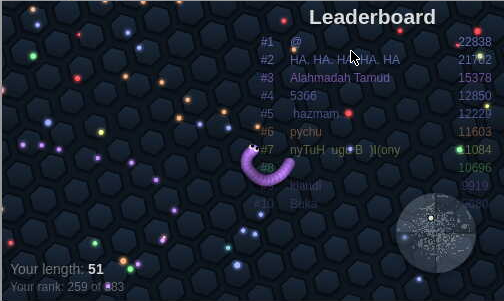

In [98]:
greystate = rgb2grey(state)
greystate = greystate.astype('uint8')
viewer = ImageViewer(greystate)
viewer.show()


In [100]:
greystate = rgb2grey(state)
(greystate*255).astype('uint8')
viewer = ImageViewer(greystate)
viewer.show()

[]